In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [49]:
# uplading data file from local drive in google colab
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain (1).csv


In [50]:
import io

# reading csv file as pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['headbrain.csv']))
print(data.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [51]:
data.shape

(237, 4)

In [52]:
# collecting x & y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [53]:
# total no.of input values
val_count = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(val_count):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.26342933948939945 
c = 325.57342104944223


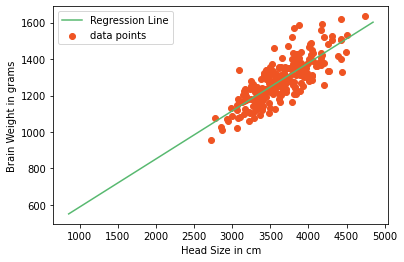

In [54]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X,Y,c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [55]:
# calculating R-squared value for measuring goodness of our model. 
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(int(val_count)):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.6393117199570003


In [56]:
# Linear regression implementation using sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape(val_count, 1)
reg = LinearRegression()
reg = reg.fit(X,Y)

Y_pred = reg.predict(X)
r2_square = reg.score(X, Y)

print (r2_square)

0.639311719957
